<a href="https://colab.research.google.com/github/itslokeshrawat/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## importing libraries and modules ##

import pandas
import numpy as np
import string

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.optimizers import Adam


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt') 
from nltk.tokenize import RegexpTokenizer

import matplotlib.pyplot as plt



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Function to convert   
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 

In [ ]:
## Checking out the data set for training the model ##

df = pandas.read_csv('/content/tweets_data.csv')
print(df)

       Unnamed: 0                                            message  label
0             106  just had a real good moment. i missssssssss hi...      0
1             217         is reading manga  http://plurk.com/p/mzp1e      0
2             220  @comeagainjen http://twitpic.com/2y2lx - http:...      0
3             288  @lapcat Need to send 'em to my accountant tomo...      0
4             540      ADD ME ON MYSPACE!!!  myspace.com/LookThunder      0
...           ...                                                ...    ...
10309      802309  No Depression by G Herbo is my mood from now o...      1
10310      802310  What do you do when depression succumbs the br...      1
10311      802311  Ketamine Nasal Spray Shows Promise Against Dep...      1
10312      802312  dont mistake a bad day with depression! everyo...      1
10313      802313                                                  0      1

[10314 rows x 3 columns]


In [ ]:
## Making labels array ##

labels = []


for label in df['label']:
  labels.append(label)

print(labels)

## Making corresponding text array ##

temp1 = []

for msg in df['message']:
  temp1.append(msg)

print(temp1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
### Removing stopwords and punctuations ###

stop_words = set(stopwords.words('english')) 

text = []

for i, msg in enumerate(temp1):

    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(msg) 

    filtered_sentence = [] 
    
    for w in word_tokens: 
      if w not in stop_words: 
          filtered_sentence.append(w) 
    
    text.append(listToString(filtered_sentence))
    
    

print(text[0:20])

['real good moment missssssssss much', 'reading manga http plurk com p mzp1e', 'comeagainjen http twitpic com 2y2lx http www youtube com watch v zoGfqvh2ME8', 'lapcat Need send em accountant tomorrow Oddly I even referring taxes Those supporting evidence though', 'ADD ME ON MYSPACE myspace com LookThunder', 'sleepy good times tonight though', 'SilkCharm nbn someone already said fiber home mean least regular', '23 24ï ½C possible today Nice', 'nite twitterville workout ciao', 'daNanner Night darlin Sweet dreams', 'Good morning everybody', 'Finally I created WordPress Blog There already blog Seattle Coffee Community http tinyurl com c5uufd', 'kisha cnt get u til get frm u remember ur top', 'nicolerichie Yes remember band It Awesome Will please reply', 'I really love reflections shadows', 'blueaero ooo fantasy like fantasy novels check', 'rokchic28 probs I sell nothing blog http snedwan com I get listen band iTunes', 'shipovalov quot NOKLA connecting people quot', 'Once stayed late start 

In [ ]:
## defining some variables ##

maxlen = 100
training_samples = 8000
validation_samples = 500
test_samples = 1814
max_words = 10000

In [ ]:
## Just putting in the code for the tokenizer ##

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(text)

sequences = tokenizer.texts_to_sequences(text)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


### Padding the data to make of the same length ###
data = pad_sequences(sequences, maxlen=maxlen)

### Shapes ###
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 22686 unique tokens.
Shape of data tensor: (10314, 100)
Shape of label tensor: (10314,)


In [ ]:
## this is for shuffling the data


indices = np.arange(data.shape[0]) ## makes an array of integers from 0 to 10,314 [0,1, .. , 10314]
np.random.shuffle(indices)

data = data[indices]

labels = labels[indices]

In [ ]:
## splitting into train and validate directories

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]
x_test = data[training_samples + validation_samples:]
y_test = labels[training_samples + validation_samples:]


In [ ]:
## --- Donot run again! ## just for getting pretraained embeddings into the drive ## -- Donot run again!

!unzip '/content/drive/My Drive/glove.twitter.27B.zip' -d '/content/drive/My Drive'

In [ ]:

## here we are basically opening a .txt file and parsing it to obtain words and their associated coefficients in each line. 
## Then we make a dictionary to make the word as the key and the coefficients as the value

glove_dir = '/content/drive/My Drive/glove.twitter_unzipped/glove.twitter.27B.100d.txt'

embeddings_index = {}
f = open(glove_dir)
for line in f:
   values = line.split()
   word = values[0]
   coefs = np.asarray(values[1:], dtype='float32')
   embeddings_index[word] = coefs

f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 1193514 word vectors.


In [ ]:

## Making an embeddings matrix from embeddings vector ##

embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
   if i < max_words:
       embedding_vector = embeddings_index.get(word)
   if embedding_vector is not None:
       embedding_matrix[i] = embedding_vector

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
125/125 [==============================] - 1s 6ms/step - loss: 0.4146 - acc: 0.8736 - val_loss: 0.2487 - val_acc: 0.9420
Epoch 2/10
125/125 [==============================] - 1s 5ms/step - loss: 0.1913 - acc: 0.9579 - val_loss: 0.157

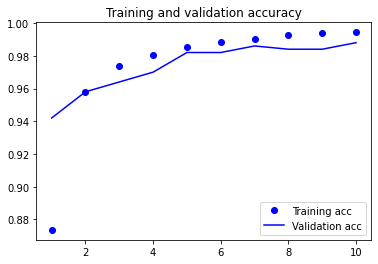

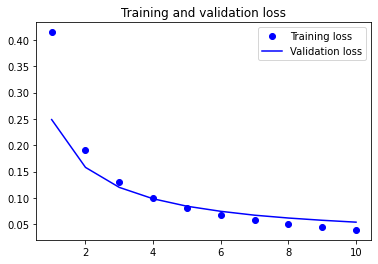

In [ ]:

########### Model with the pre-trained word embeddings layer ############


## defining a model ##

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


## adding the embeddings layer and freezing it ##

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


## training the model ##

opt = Adam(lr = 0.0001)
model.compile(optimizer= opt,
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=64,
validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')


## Plotting the results ##

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



In [ ]:
### testing the model 1 ##

model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)


57/57 [==============================] - 0s 2ms/step - loss: 0.0658 - acc: 0.9813


[0.06579142063856125, 0.981256902217865]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 1,040,009
Trainable params: 1,040,009
Non-trainable params: 0
_________________________________________________________________
Epoch 1/7
250/250 [==============================] - 4s 16ms/step - loss: 0.5125 - acc: 0.7753 - val_loss: 0.4329 - val_acc: 0.8060
Epoch 2/7
250/250 [==============================] - 4s 16ms/step - loss: 0.4144 - acc: 0.8238 - val_loss: 0.3

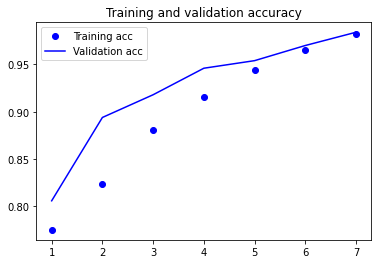

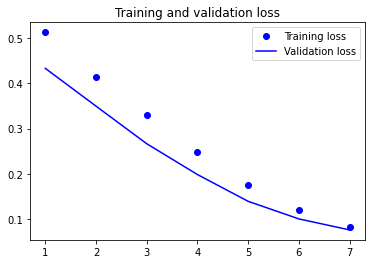

In [ ]:

############# Model without the embeddings matrix ###########


## defining a model ##

model2 = Sequential()
model2.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model2.add(Flatten())
model2.add(Dense(4, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()


## training the model ##

opt = Adam(lr = 0.0001)
model2.compile(optimizer= opt,
loss='binary_crossentropy',
metrics=['acc'])
history = model2.fit(x_train, y_train,
epochs=7,
batch_size=32,
validation_data=(x_val, y_val))
model2.save_weights('pre_trained_glove_model2.h5')


## Plotting the results ##

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
 ### testing the model 2 ##

model2.load_weights('pre_trained_glove_model2.h5')
model2.evaluate(x_test, y_test)

57/57 [==============================] - 0s 2ms/step - loss: 0.0971 - acc: 0.9719


[0.09711162745952606, 0.9718853235244751]

In [ ]:
########## predicting depression in tweets with keyword covid ############



## loading the data ##

covid_df = pandas.read_csv('/tweets1.csv', sep='#', header=None) 
covid_df.columns = ['message']
covid_df= covid_df.astype(str) ## to convert float to string


## storing the data in an array ##

temp2 = []

for msg in covid_df['message']:
  temp2.append(msg)


### Removing stopwords and punctuations ###

stop_words = set(stopwords.words('english')) 

covid_text = []

for i, msg in enumerate(temp2):

    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(msg) 

    filtered_sentence = [] 
    
    for w in word_tokens: 
      if w not in stop_words: 
          filtered_sentence.append(w) 
    
    covid_text.append(listToString(filtered_sentence))

print(covid_text)


## Tokenization of the data ##


tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(covid_text)

sequences1 = tokenizer.texts_to_sequences(covid_text)
word_index1 = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index1))

## padding to make data of equal length ##

covid_data = pad_sequences(sequences1, maxlen=maxlen)

## Making test data ##

x_test_covid = covid_data[:]

## Making predictions ##

y_pred_covid = model2.predict_classes(x_test_covid)

## looping through results to segregate dep vs no-dep ##

dep_c = 0
ndep_c = 0

for y in y_pred_covid:
  if y == 0:      ## 0 is for not depressive and 1 is for depressive
    ndep_c += 1

  else:
    dep_c +=1

total = ndep_c + dep_c
ndep_per = ndep_c*100/total
dep_per = dep_c*100/total

print(f'{ndep_per} percent of the tweets are not depressive')
print(f'{dep_per} percent of the tweets are depressive')



['California government incentivizes COVID parties https www zerohedge com political california soon paying 1250 people test positive coronavirus', 'Yes As taxpayer medical field spend money PPE Training Facilities Staff We guaranteed exit point COVID Treat accordingly Not already cost 170bn Do right', 'Learn game changing options help private practice prosper post COVID 19 world https www livewellaps com pppp livewellaps doctorownedpractices issuesfacingprivatepractices medicalbusinesssuccess officemanagersuccess privatepracticesuccess pic twitter com OgKUStQcaS', 'Just friendly reminder help stay COVID Free Before visit park sure check keep everyone safe https www evergreensportsplex com reopening rules pic twitter com uY2GykLogt', 'NM employers must report positive COVID 19 cases among staff state within hours days More new emergency rule 89 9 FM morning https buff ly 2PLIYG1 pic twitter com q6gc2oltU8', 'Let Them Play Just another example We know small kids contract Covid article s

In [ ]:
########## predicting depression in neutral tweets (with keyword the) ############

## loading the data ##

neutral_df = pandas.read_csv('/n_pred.csv', sep='>', header=None) 
neutral_df.columns = ['message']
neutral_df= neutral_df.astype(str) ## to convert float to string


## storing the data in an array ##

temp3 = []

for msg in neutral_df['message']:
  temp3.append(msg)

print(temp3)


### Removing stopwords and punctuations ###

stop_words = set(stopwords.words('english')) 

neutral_text = []

for i, msg in enumerate(temp3):

    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(msg) 

    filtered_sentence = [] 
    
    for w in word_tokens: 
      if w not in stop_words: 
          filtered_sentence.append(w) 
    
    neutral_text.append(listToString(filtered_sentence))

print(neutral_text)



## Tokenization of the data ##


tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(neutral_text)

sequences2 = tokenizer.texts_to_sequences(neutral_text)
word_index2 = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index2))

## padding to make data of equal length ##

neutral_data = pad_sequences(sequences2, maxlen=maxlen)

## Making test data ##

x_test_neutral = neutral_data[:]

## Making predictions ##

y_pred_neutral = model2.predict_classes(x_test_neutral)

## looping through results to segregate dep vs no-dep ##

dep_n = 0
ndep_n = 0

for y in y_pred_neutral:
  if y == 0:      ## 0 is for not depressive and 1 is for depressive
    ndep_n += 1

  else:
    dep_n +=1

total = ndep_n + dep_n
ndep_per_n = ndep_n*100/total
dep_per_n = dep_n*100/total

print(f'{ndep_per_n} percent of the tweets are not depressive')
print(f'{dep_per_n} percent of the tweets are depressive')


[' Hiii, Trusted proofs here 💞', ' Check out Audio Book Elven Magic on Audible, amazon pay $75 for every bounty(have to be a member for 91 days consecutively) . https://www.audible.com/pd/B078WHKMN3/?source_code=AUDFPWS0223189MWT-BK-ACX0-105123&ref=acx_bty_BK_ACX0_105123_rh_us\xa0…', ' Sorry, i’m in 1:18 seconds into round 12 of the Trinidad vs Hopkins fight 😂🤣🤣🤣🤣😂IM LAUGHING AS “TITO” is getting laid out 😂🤣🤣🤣🤣🤣🤣😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂🤣😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂LIGHTS OUT 😂🤣🤣🤣🤣🤣🤣  pic.twitter.com/eukP1G1Eqe', " oh i do. the satisfaction that you don't get your way in getting me to stop calling you shit when you started shit with me sweetheart.", ' Instead of focusing on other people. Focus on yourself and what your preferences are. Stop enforcing your opinions that only and stop trying to find gratification for your decisions. Tho maybe me saying this is the same as people telling people what to buy.', ' Reverend Porter has been accused of molesting over 40 children in Sarasota County and from wh

In [ ]:
########## predicting depression in neutral tweets (with keyword quarantine) ############

## loading the data ##

q_df = pandas.read_csv('/content/q_pred.csv', sep='>', header=None) 
q_df.columns = ['message']
q_df= q_df.astype(str) ## to convert float to string


## storing the data in an array ##

temp4 = []

for msg in q_df['message']:
  temp4.append(msg)

print(temp4)


### Removing stopwords and punctuations ###

stop_words = set(stopwords.words('english')) 

q_text = []

for i, msg in enumerate(temp4):

    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(msg) 

    filtered_sentence = [] 
    
    for w in word_tokens: 
      if w not in stop_words: 
          filtered_sentence.append(w) 
    
    q_text.append(listToString(filtered_sentence))

print(q_text)

## Tokenization of the data ##


tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(q_text)

sequences3 = tokenizer.texts_to_sequences(q_text)
word_index3 = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index3))

## padding to make data of equal length ##

q_data = pad_sequences(sequences3, maxlen=maxlen)

## Making test data ##

x_test_q = q_data[:]

## Making predictions ##

y_pred_q = model2.predict_classes(x_test_q)

## looping through results to segregate dep vs no-dep ##

dep_q = 0
ndep_q = 0

for y in y_pred_q:
  if y == 0:      ## 0 is for not depressive and 1 is for depressive
    ndep_q += 1

  else:
    dep_q +=1

total = ndep_q + dep_q
ndep_per_q = ndep_q*100/total
dep_per_q = dep_q*100/total

print(f'{ndep_per_q} percent of the tweets are not depressive')
print(f'{dep_per_q} percent of the tweets are depressive')


[' that looks like Khalid during quarantine', ' On 16 August 4G will be started in two districts, but here is the catch: 2G is already COVID positive, after 4G will come in close contact with 2G, it will be declared COVID positive and again isolated for quarantine period (14 months). This process is called 4G testing.', ' But UG is d best movie country in d world, d rate at which things happen. Ewooh.  Just frm d quarantine.  Daddy adr. Brian wht  Zaake  Bizonto Gunta Mun g n crystal  M7 exr  Covid fud Boda tp Zari Andrew mwe  Winnie nwa  Kenzo (mbata Zahara UG Zaabu. 🙆', " .@realDonaldTrump i'm voting for biden if you dont put at least another $2000 directly into my bank account. make it $5000 and i'll vote for you", ' How Can Entrepreneurs Stay Productive During Quarantine  https://ift.tt/2DNYMFI', ' This twitter page is a collection of wild tinder messages I don’t even care anymore quarantine has us all mad here 💫🔮', ' now that I’m out of my sling and don’t have a bike I’m going bik

In [ ]:
########## predicting depression in neutral tweets (with keyword pandemic) ############

## loading the data ##

p_df = pandas.read_csv('/content/hello3.csv', sep=',', header=None) 
p_df = p_df[10][1:]
p_df= p_df.astype(str) ## to convert float to string


## storing the data in an array ##

temp5 = []

for msg in p_df:
  temp5.append(msg)

print(temp5)


### Removing stopwords and punctuations ###

stop_words = set(stopwords.words('english')) 

p_text = []

for i, msg in enumerate(temp5):

    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(msg) 

    filtered_sentence = [] 
    
    for w in word_tokens: 
      if w not in stop_words: 
          filtered_sentence.append(w) 
    
    p_text.append(listToString(filtered_sentence))

print(p_text)


## Tokenization of the data ##


tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(p_text)

sequences4 = tokenizer.texts_to_sequences(q_text)
word_index4 = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index4))

## padding to make data of equal length ##

p_data = pad_sequences(sequences4, maxlen=maxlen)

## Making test data ##

x_test_p = p_data[:]

## Making predictions ##

y_pred_p = model2.predict_classes(x_test_p)

## looping through results to segregate dep vs no-dep ##

dep_p = 0
ndep_p = 0

for y in y_pred_p:
  if y == 0:      ## 0 is for not depressive and 1 is for depressive
    ndep_p += 1

  else:
    dep_p +=1

total = ndep_p + dep_p
ndep_per_p = ndep_p*100/total
dep_per_p = dep_p*100/total

print(f'{ndep_per_p} percent of the tweets are not depressive')
print(f'{dep_per_p} percent of the tweets are depressive')


['The blond on the boat sticking her thumb up.... !\n\nIs she trying to thumb a lift.\n\nnever seen anything so horrendous in my life what an absolute moron she really is...  https://twitter.com/SkyNews/status/1293102560438607872\xa0…', 'Fuel your dreams with HBL CarLoan! \n\nAvail the lowest fixed mark-up rate at 10.99% and special insurance rate at 2% on all cars till 31st August, 2020.\n\nApply now by tapping the button below or calling HBL PhoneBanking at 111-111-425.', 'WHAT DO YOU MEAN LOSING ME IS BETTER THAN LOSING YOU NO WHAT DO YOU MEAN  pic.twitter.com/XoOLBXBLI1', 'Having to be the parents who tell your kids you don’t want them to go on the park full of all the other kids is tough. Proud mine are smart enough to understand', 'FIRST PICTURE IS BLUR. 👎  https://twitter.com/theboyzjoels/status/1293141696834760704\xa0…', '“I’m not doing anything wrong. This is the first time that’s why I am deeply hurt but when I come back, I can handle this. Unless….” The last word was like a 

(-0.5, 399.5, 199.5, -0.5)

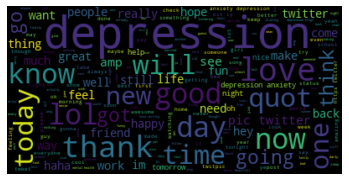

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


 
with open('/tweets_data.csv', 'r', encoding = 'utf8') as inp, open('/tweets_data.txt', 'w', encoding = 'utf8') as out:
     
     for line in inp:
         line = line.replace(',', ':')
         out.write(line)

        


text_w = ""
with open('/tweets_data.txt', encoding='utf-8') as f:
    text_w = ''.join(f.readlines())
        
wordcloud = WordCloud().generate(text_w)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


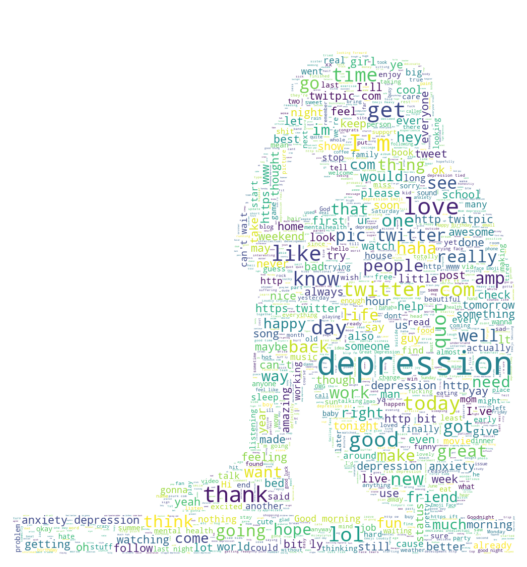

In [ ]:
from PIL import Image
!pip install wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


text_w = ""
with open('/content/tweets_data.txt', encoding='utf-8') as f:
    text_w = ''.join(f.readlines())


image_file = "/content/sil2.jpg"

# create mask
alice_mask = np.array(Image.open(image_file))

# remove stopwords
stop_words = set(stopwords.words('english'))

# generate word cloud
wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stop_words)
wc.generate(text_w)

# plot the word cloud
plt.figure(figsize=(8,6), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()